In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data=pd.read_csv('ex2data1.txt',names=['Exam 1','Exam 2','Accepted'])
data.head()

,Exam 1,Exam 2,Accepted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


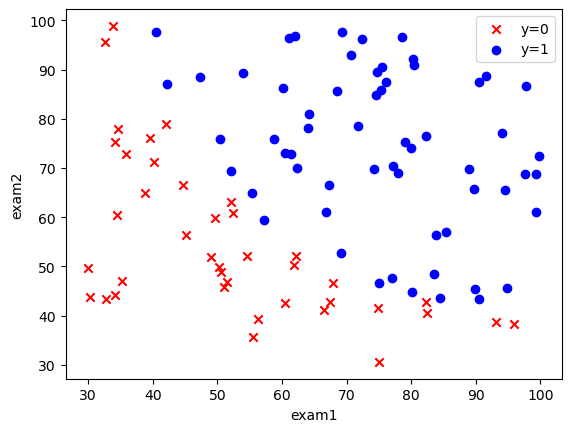

In [49]:
fig,ax=plt.subplots()

ax.scatter(data[data['Accepted']==0]['Exam 1'],data[data['Accepted']==0]['Exam 2'],c='r',marker='x',label='y=0')
ax.scatter(data[data['Accepted']==1]['Exam 1'],data[data['Accepted']==1]['Exam 2'],c='b',marker='o',label='y=1')
ax.legend()
ax.set(xlabel='exam1',ylabel='exam2')
plt.show()

In [50]:
def get_Xy(data):
    
    data.insert(0,'ones',1)
    X_=data.iloc[:,0:-1]
    X=X_.values

    y_=data.iloc[:,-1]
    y=y_.values.reshape(len(y_),1)

    return X,y

In [51]:
X,y=get_Xy(data)
print(X.shape)
print(y.shape)

(100, 3)
(100, 1)


In [52]:
def sigmoid(z):

    return 1/(1+np.exp(-z))

In [53]:
def costFunction(X,y,theta):
   
    A=sigmoid(X@theta)

    first=y*np.log(A)
    second=(1-y)*np.log(1-A)

    return -np.sum(first+second)/len(X)

In [54]:
theta=np.zeros((3,1))
theta.shape

(3, 1)

In [55]:
cost_init=costFunction(X,y,theta)
print(cost_init)

0.6931471805599453


In [56]:
def gradientDescent(X,y,theta,iters,alpha):
    
    m=len(X)
    costs=[]

    for i in range(iters):
        A=sigmoid(X@theta)
        theta=theta-alpha*X.T@(A-y)/m
        cost=costFunction(X,y,theta)
        costs.append(cost)

        if i%1000==0:
            print(cost)

    return costs,theta

In [57]:
alpha=0.004
iters=200000

In [58]:
costs,theta_final=gradientDescent(X,y,theta,iters,alpha)

1.9886538578930084
3.0781700198641544
5.487009635362496
1.8519433661332636
2.9551289424083604
5.438688730769618
1.8046128090728513
2.831271577607404
5.3886531633606145
1.7561538117121567
2.7066763807478122
5.3365673644957425
1.7062807047694801
2.5818508519054264
5.281774101800353
1.6544129958512053
2.4578430947435748
5.223255119969365
1.5996612097145566
2.336247751941462
5.159653459570274
1.5408871901849082
2.2190492038468874
5.089387088751128
1.4768567851081458
2.10826850905365
5.010845104587983
1.4064493632805852
2.0054338903832707
4.9225734611717336
1.3288041261254444
1.9109646054893659
4.82325748482661
1.2432202250971685
1.8235866121521405
4.711246821296763
1.1486277932139568
1.7397667362448006
4.583257400457349
1.0423478306006684
1.652586574603404
4.430932868329269
0.9166267386002204
1.5465331276550862
4.224624720512682
0.7330944584991148
1.510003264515867
0.9289589839543182
0.7921873015367228
0.5841259283563387
0.24166982593424396
0.2663906486830507
1.2041946261825291
3.746440041

In [59]:
theta_final

array([[-23.77366655],
       [  0.20685936],
       [  0.19996902]])

In [60]:
def predict(X,theta):
    prob=sigmoid(X@theta)

    return [1 if x >=0.5 else 0 for x in prob]

In [61]:
y_=np.array(predict(X,theta_final))
y_pre=y_.reshape(len(y_),1)

acc=np.mean(y_pre==y)

print(acc)

0.91


In [62]:
coef1=-theta_final[0,0]/theta_final[2,0]
coef2=-theta_final[1,0]/theta_final[2,0]

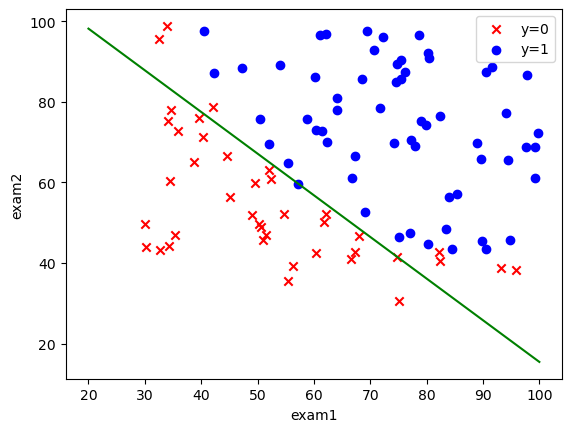

In [64]:
x=np.linspace(20,100,100)
f=coef1+coef2*x

fig,ax=plt.subplots()

ax.scatter(data[data['Accepted']==0]['Exam 1'],data[data['Accepted']==0]['Exam 2'],c='r',marker='x',label='y=0')
ax.scatter(data[data['Accepted']==1]['Exam 1'],data[data['Accepted']==1]['Exam 2'],c='b',marker='o',label='y=1')
ax.legend()
ax.set(xlabel='exam1',ylabel='exam2')
ax.plot(x,f,c='g')
plt.show()